# Import Data

In [1]:
# get data from json file and save in dataframe

import pandas as pd
df = pd.read_json(r'transactions-30days.json')

In [2]:
# first look at data
#len(df) = 10321

df.head()

,status,transaction_hash,block,from,interacted_with,value,1_from,1_to,1_for,2_from,...,32_from,32_to,32_for,33_from,33_to,33_for,34_from,34_to,34_for,to
0,Success,0x4548a45e2c1dfdd7b35af55bf8505747e6384646d60d...,130115226535,0x4a4edacd5fcecf34c457f4198ddd5385de0dbe85,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,13.362382,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Success,0x9f4a517ae62a0d8e3b85a354fdff56d0a8e2caeaf62c...,1300471913340,0x2ec0a34de9e2f9577e20b39fbb9f85106cf2e768,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.029041,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Success,0x7d7cab57396f1470f858b4da553b1a02f5ca98211ebc...,1300470513358,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,27.810380,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Success,0xa863c232f5c6c39e0aef9eb36d039b4efaabdf09c56f...,1299049527569,0x46c2da32fc5effdbc1d328ba873c925568e41564,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,10.573113,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Success,0x243c118f1abbeb7b58fb52155caf47cbb74137f358a8...,1298506732998,0x4a9a40b2c44b7d32ecf4e0cc66f5304518ec0a59,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.031051,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next step is to inspect NaN values.

# Data Cleaning

## Missing Values

In [3]:
# print sum of missing values
sum_missing_values = df.isnull().sum()
pd.options.display.max_rows = len(sum_missing_values)
print(sum_missing_values)

status                          0
transaction_hash                0
block                           0
from                            0
interacted_with                22
value                          22
1_from                         22
1_to                           22
1_for                          22
2_from                         23
2_to                           23
2_for                          23
3_from                         31
3_to                           31
3_for                          31
4_from                         31
4_to                           32
4_for                          32
5_from                        263
5_to                          263
5_for                         263
6_from                        273
6_to                          273
6_for                         273
transaction_fee                 0
gas_limit                       0
gas_used_by_transaction         0
base_fee_per_gas                0
max_fee_per_gas               349
max_priority_f

NaN values can be found in a lot of "num_from","num_to" and "num_for" columns. This is due to the differences in functionality of smart contracts the transactions where collected from. These field will be reduced to "reinvest_reward" and "reinvested_value" columns. The other transactions do not contribute to the profitability.

Columns "interacted_with" and "value" contain 22 NaN values. Furthermore, columns "max_fee_per_gas", "max_priority_fee_per_gas" and "txn_savings" also contain 349 NaN values, which requires further investigation.

In [4]:
df.loc[df.interacted_with.isnull()]

,status,transaction_hash,block,from,interacted_with,value,1_from,1_to,1_for,2_from,...,32_from,32_to,32_for,33_from,33_to,33_for,34_from,34_to,34_for,to
6874,Success,0xbec73a0118f3229ddb18911125881eb8d8db3e2bd5d6...,1293922092760,0x725f516139fb411e1d9374a54f4b15c641850e0c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x7140d22afc110741323ef29868c48b566a3295d40x71...
6877,Success,0x755cb38fde4b097265f5e1f59fff27c7cbe2d71e7204...,12468991562993,0x14c07a5f107a9d15a6c2d0c131dcb3933386503e,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x7140d22afc110741323ef29868c48b566a3295d40x71...
6878,Success,0xc697c75d13069a8b180e2f616dedbc4a0f646a6f7a3a...,12375668656317,0x14c07a5f107a9d15a6c2d0c131dcb3933386503e,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x7140d22afc110741323ef29868c48b566a3295d40x71...
6879,Success,0xea95b528d0b2e0dd68d6f583d79be304b00dce3ef528...,12249476782511,0x14c07a5f107a9d15a6c2d0c131dcb3933386503e,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x7140d22afc110741323ef29868c48b566a3295d40x71...
8103,Success,0x413a58189de896872975e5af55d5edae7892e3916e06...,12467464566699,0x14c07a5f107a9d15a6c2d0c131dcb3933386503e,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x734ee20bbad6d191432b34fbfd1493c16f065e9c0x73...
8122,Success,0xfabf8da3ae2f6e9a51f7248b0dbd0e2b10f4eb9c1e1b...,85950004439186,0x7bfc4335299665fe78389912b3bb80ac06fc5c52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x734ee20bbad6d191432b34fbfd1493c16f065e9c0x73...
8520,Success,0x84c711cbfdb7055374785e909fda914629f63e04f1eb...,104618102572979,0xa8ab9beaf59f75f969261e1a22893be3994797d2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x6ca300f7b764580e52889341e8941cca7cfca7270x6c...
8832,Success,0x06f4fd3baf42169730d457540643bfdeba43d5a66984...,12594650440555,0x7ec7cf344fba4d73fe5a80c25c859ce38b068205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x8369e0311295de318e6e619d3cd60e4c0335f5770x83...
8835,Success,0x7a95d8623b0edf012c44aef0a89cb420e0d2bd28c27d...,12129125906083,0x14c07a5f107a9d15a6c2d0c131dcb3933386503e,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x8369e0311295de318e6e619d3cd60e4c0335f5770x83...
8897,Success,0xe9bc0f02ec5fe7596ebf99252f108abe567df0284073...,12249463785844,0x14c07a5f107a9d15a6c2d0c131dcb3933386503e,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xd60709441b483453e84ad8e1c30f2e9ee116851d0xd6...


The "interacted_with" and "value" transactions with NaN values overlap and can be dropped, because they only make 22 out of 10321 transactions and show further interesting behaviour.

In [5]:
df = df.dropna(subset="value")
len(df)

10299

In [6]:
df.loc[df.max_fee_per_gas.isnull()]

,status,transaction_hash,block,from,interacted_with,value,1_from,1_to,1_for,2_from,...,32_from,32_to,32_for,33_from,33_to,33_for,34_from,34_to,34_for,to
24,Success,0xad095e5b52b41cfb7ed8f00f07b8000b07996b078eb8...,12825915192180,0xc7e21249aec75d79da0cb12cb4738dd14d276559,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,18.078342,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Success,0x2cf7c8428d8db73d4d4f0b092a0d8a390472ba578f3c...,12769028249088,0x2a549e5f473212829d4000305f27529c1ccbab9a,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,12.510000,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Success,0xaf9053e1b14340791a5e397d1b79a557ae1810703a8a...,12724290293846,0xbf63a30d911ef4a3d73c9e3bf3d8012e93d6ded3,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,13.963928,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Success,0x41fb995d6e8e54462edb77fb27bd1aaa7c4426095a7e...,12544453473770,0x707f652731eb9a2710e679eb247e36cff7ac0488,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.121707,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Success,0x572794b12b998735a0fc9e845371551edb6837853fae...,12516866501377,0x13ddf693af3caa06a83843e1a5777eb47af32c37,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.0,0x5cfcd7e6d055ba4f7b998914336254ade3f69f26,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0.009441,0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,Success,0x5ca5df638e387d2e31a229ac4d7a2d0b6b114dc388d9...,61207186917391,0x2252a2be2d9d70a9249504631f17c841e5adbb60,0xfdd8b1444b3a929979d84e2255ab52cb9f7b5a4c,0.0,0xd606199557c8ab6f4cc70bd03facc96ca576f142,0x34c8712cc527a8e6834787bd9e3ad4f2537b0f50,1093.500000,0x34c8712cc527a8e6834787bd9e3ad4f2537b0f50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10214,Success,0xd28b0095487eb9aa844dbaa869e9bdf8d3d58ac0b148...,67673406271392,0x42691b425dce70771527a354d6da8fce7a1d61ad,0x45af056a757d6649c24d74c2e4fe449682f6a2db,0.0,NullAddress:0x000…000,0xaff90532e2937ff290009521e7e120ed062d4f34,77.703027,NullAddress:0x000…000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10216,Success,0xffbd91590d639c32e75b6ec285e8fde93ec3f7d04e73...,105318442507185,0xf890330e6fe822a142af2fd48198bcd25d5461e8,0x26d9234b8409df2f2967d6af06a268b87909f5a0,0.0,NullAddress:0x000…000,0xaff90532e2937ff290009521e7e120ed062d4f34,6.426256,NullAddress:0x000…000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10265,Success,0x9933c75d401bfec50fdb4a2176c14fac9fd0731d7a35...,115877541470306,0xc546cb6234f07aab70df616b68ca867528981bc3,0x26d9234b8409df2f2967d6af06a268b87909f5a0,0.0,NullAddress:0x000…000,0xaff90532e2937ff290009521e7e120ed062d4f34,4.132271,NullAddress:0x000…000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Same logic as above applies to "max_fee_per_gas", "max_priority_fee_per_gas" and "txn_savings" columns.

In [7]:
df = df.dropna(subset="max_fee_per_gas")
len(df)

9953

~3,6% of the original data set was removed due to missing values.

## Fix Blocknumbers

In [8]:
# get lowest and highest blocknumber from data
print("min: " + str(df.block.min()) + "; max: " + str(df.block.max()))

# get timestamp of blocknumber manually
df.block.unique()

min: 1303650571; max: 120340801001677


array([   130115226535,   1300471913340,   1300470513358, ...,
       115677501491552, 115623091496993, 117204291338880], dtype=int64)

In [9]:
# investigate block number
df.iloc[8520]

status                                                                Success
transaction_hash            0xc1b02c76c5949591a62c2a6b1a42513e36d4052a3855...
block                                                          12813505221634
from                               0xcf462c1b0a635173c8ba568cd011bd38d5d0ad4a
interacted_with                    0x0c4684086914d5b1525bf16c62a0ff8010ab991a
value                                                                     0.0
1_from                                                                   From
1_to                               0x0cf605484a512d3f3435fed77ab5ddc0525daf5f
1_for                                                                     0.0
2_from                                                                   From
2_to                                                 YieldYak:YakFeeCollector
2_for                                                                0.173619
3_from                             0x0c4684086914d5b1525bf16c62a

Crawler adds some numbers to 8 digit blocknumber, which have to be removed. Also some blocknumbers outside 30 day window found, they will be dropped.

In [10]:
new_df = df.copy()
new_df.block = new_df.block.map(lambda x: int(str(x)[0:8]))
new_df.block = new_df.block[new_df.block < 13054570]
new_df.block = new_df.block[new_df.block > 11752740]
new_df.dropna(subset="block", inplace=True)
print(new_df.block.sort_values())
df = new_df.copy()
len(df)

4252     11752741.0
4254     11752741.0
4255     11752741.0
5136     11752741.0
4256     11752741.0
            ...    
7806     13033436.0
9717     13036505.0
10301    13038723.0
10300    13038768.0
10271    13051833.0
Name: block, Length: 7487, dtype: float64


7487

~27,46% of originally crawled transactions were out of 1 month timeframe (11752740 -> Mar-06-2022; 13054570 -> Apr-06-2022)

## Simplify _from,_to,_for Columns

### Identify and get Reinvest Reward from Data

In [11]:
# define helper functions
def getReinvestReward(transaction):
    # find "from" in transaction
    value = 0
    counter = 0
    index = ""
    for x in transaction:
        if x == transaction["from"]:
            if counter == 1:
                index = transaction.index[transaction==x].tolist()
                #print(index)
                newIndex = str(index[1][:-2]) + "for"
                value = transaction[str(newIndex)]
                break
            counter = counter + 1
    return value

In [12]:
# get reinvest reward
arr_reinvest_reward = []
for i in range(len(df)):
    arr_reinvest_reward.append([df.iloc[i]["interacted_with"] ,getReinvestReward(df.iloc[i])])

reinvest_reward_df = pd.DataFrame(arr_reinvest_reward, columns=["interacted_with", "reinvest_reward"])
print(reinvest_reward_df)

                                 interacted_with  reinvest_reward
0     0x957ca4a4aa7cdc866cf430bb140753f04e273bc0         0.013362
1     0x957ca4a4aa7cdc866cf430bb140753f04e273bc0         0.000029
2     0x957ca4a4aa7cdc866cf430bb140753f04e273bc0         0.027810
3     0x957ca4a4aa7cdc866cf430bb140753f04e273bc0         0.010573
4     0x957ca4a4aa7cdc866cf430bb140753f04e273bc0         0.000031
...                                          ...              ...
7482  0x39f7fcb3af11b0a274514c581d468739e75f64ec       270.700509
7483  0x39f7fcb3af11b0a274514c581d468739e75f64ec       543.585362
7484  0x22ede03f1115666cf05a4bafafaee8f43d42cd56         0.059133
7485  0xb940da8b71791c1f42cc612d1af427878ec1a369         0.073649
7486  0xb940da8b71791c1f42cc612d1af427878ec1a369       665.289356

[7487 rows x 2 columns]


In [13]:
# rewards sometimes payed in different currency than AVAX
reinvest_reward_df.reinvest_reward.sort_values()

4229       0.000000
6922       0.000000
4221       0.000000
4222       0.000000
6824       0.000000
           ...     
6855    2485.997802
6860    3047.568389
6858    3089.881993
6857    3799.429808
559     4994.831280
Name: reinvest_reward, Length: 7487, dtype: float64

Neglect reinvested value for now. 
Also currency of reinvest reward is not always in AVAX. Options:
1) Drop rows/transactions with different currency
2) Get average value over data time span
3) Convert blocknumbers to timestamp, then get exchange rate to AVAX at time of transaction creation

### Identify Reward Currencies

In [14]:
# how many smart contracts were interacted with
unique_farms_df = df.interacted_with.unique()
unique_farms_df
print(df.interacted_with.value_counts())

0x26d9234b8409df2f2967d6af06a268b87909f5a0    756
0x9e5d0e209a55de88b890d7db9f427a066144a7c4    499
0x22ede03f1115666cf05a4bafafaee8f43d42cd56    480
0x957ca4a4aa7cdc866cf430bb140753f04e273bc0    287
0xb58d38f6d71cdfbc7ace55e094e2c0e1ab6ccf52    233
                                             ... 
0xa85591ec02ef3c4057e671ed9057c34e24c3c872      1
0x1e041e7b99ad7f1c09158eea68dc472f9523790b      1
0x0b1bd40d04ff233dd4d6d3374b6f6c2ea1f024c3      1
0x76b52bbea7a468b42f646b7e9b956dd15cfc5faf      1
0x3b2ecfd19dc9ca35097f80fd92e812a53c180cd1      1
Name: interacted_with, Length: 176, dtype: int64


In [15]:
# read farms and their currencies, which were manually assigned
farms_and_currencies_df = pd.read_csv("farms_and_currencies_df.csv")

# check for unique currencies
farms_and_currencies_df.currency.unique()

array(['CYCLE', 'OLIVE', 'AVAX', 'LYD', 'BAG', 'GDL', 'CNR', 'PNG', 'THO',
       'JOE', 'DROP', 'STORM', 'ELK', 'MFI', 'AVME', 'AVE', 'YTS', 'QI'],
      dtype=object)

In [16]:
# drop "DROP" currency, only 3 entries
farms_and_currencies_df = farms_and_currencies_df[farms_and_currencies_df.currency != "DROP"]
farms_and_currencies_df.currency.unique()

array(['CYCLE', 'OLIVE', 'AVAX', 'LYD', 'BAG', 'GDL', 'CNR', 'PNG', 'THO',
       'JOE', 'STORM', 'ELK', 'MFI', 'AVME', 'AVE', 'YTS', 'QI'],
      dtype=object)

In [17]:
unique_currencies_df = farms_and_currencies_df.currency.unique()
farms_and_currencies_df.value_counts("currency")
print(129/len(farms_and_currencies_df))

0.645


64,5 % of farms pay reinvest rewards out in AVAX. A conversion of other currencies to AVAX, will greatly increase data set size.

### Get Conversion Rate of Currencies to AVAX over Time of Data Collection

In [18]:
# get lowest and highest blocknumber from data
print("min: " + str(df.block.min()) + "; max: " + str(df.block.max()))

# get timestamp of blocknumber manually
df.block.sort_values()

min: 11752741.0; max: 13051833.0


4252     11752741.0
4254     11752741.0
4255     11752741.0
5136     11752741.0
4256     11752741.0
            ...    
7806     13033436.0
9717     13036505.0
10301    13038723.0
10300    13038768.0
10271    13051833.0
Name: block, Length: 7487, dtype: float64

In [19]:
import requests
# get coin names for coingecko api
coin_names = ["cycle-token", "olivecash", "avalanche-2", "lydia-finance", "baguette", "gondola-finance", "canary", "pangolin", "thorus", "joe", "storm-token", "elk-finance", "marginswap", "avme", "avaware", "yetiswap", "benqi"]
# call them and save them in response_arr
response_arr = []
for name in coin_names:
    response_arr.append(requests.get("https://api.coingecko.com/api/v3/coins/"+str(name)+"/market_chart/range?vs_currency=usd&from=1646550000&to=1649224800").json())

In [20]:
just_prices = []
import numpy as np
# get min, avg, max, currency -> convert to df
for history in response_arr:
    _aa = []
    for _2d in history["prices"]:
        _aa.append(_2d[1])
    just_prices.append(_aa)

currency_and_others = []
for index, aa in enumerate(just_prices):
    currency_and_others.append([np.min(aa), np.mean(aa), np.max(aa), unique_currencies_df[index]])

currency_and_others_df = pd.DataFrame(currency_and_others, columns=['min', 'mean', 'max', 'currency'])
print(currency_and_others_df)

          min       mean         max currency
0    1.254962   1.472020    1.647368    CYCLE
1    0.005685   0.014381    0.020891    OLIVE
2   66.103571  83.779406  102.755238     AVAX
3    0.002574   0.003013    0.004196      LYD
4    0.001544   0.002228    0.005002      BAG
5    0.000216   0.000258    0.000294      GDL
6    0.001961   0.002317    0.002796      CNR
7    0.162223   0.206260    0.251716      PNG
8    0.030597   0.065606    0.106231      THO
9    0.802873   1.051357    1.522745      JOE
10   0.008225   0.010531    0.013065    STORM
11   1.625195   1.888486    2.131663      ELK
12   0.113144   0.123065    0.133484      MFI
13   0.210811   0.243593    0.276125     AVME
14   0.033479   0.040254    0.050812      AVE
15   0.006558   0.008084    0.009242      YTS
16   0.044324   0.057637    0.077244       QI


In [21]:
print(currency_and_others_df)

          min       mean         max currency
0    1.254962   1.472020    1.647368    CYCLE
1    0.005685   0.014381    0.020891    OLIVE
2   66.103571  83.779406  102.755238     AVAX
3    0.002574   0.003013    0.004196      LYD
4    0.001544   0.002228    0.005002      BAG
5    0.000216   0.000258    0.000294      GDL
6    0.001961   0.002317    0.002796      CNR
7    0.162223   0.206260    0.251716      PNG
8    0.030597   0.065606    0.106231      THO
9    0.802873   1.051357    1.522745      JOE
10   0.008225   0.010531    0.013065    STORM
11   1.625195   1.888486    2.131663      ELK
12   0.113144   0.123065    0.133484      MFI
13   0.210811   0.243593    0.276125     AVME
14   0.033479   0.040254    0.050812      AVE
15   0.006558   0.008084    0.009242      YTS
16   0.044324   0.057637    0.077244       QI


### Remove unnecessary columns

In [22]:
df1 = df[["transaction_hash", "block", "from", "interacted_with", "transaction_fee", "gas_limit", "gas_used_by_transaction", "base_fee_per_gas", "max_fee_per_gas", "max_priority_fee_per_gas", "burned_fees", "txn_savings", "gas_price", "nonce"]]
df1 = df1.set_index("interacted_with")
df1.head()

,transaction_hash,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce
interacted_with,,,,,,,,,,,,,
0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0x4548a45e2c1dfdd7b35af55bf8505747e6384646d60d...,13011522.0,0x4a4edacd5fcecf34c457f4198ddd5385de0dbe85,0.021450,399180,396988,5.253076e-08,6.912876e-08,0.0000000015,0.021450,0.005994,5.403076e-08,2710
0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0x9f4a517ae62a0d8e3b85a354fdff56d0a8e2caeaf62c...,13004719.0,0x2ec0a34de9e2f9577e20b39fbb9f85106cf2e768,0.023789,379280,377088,6.158550e-08,7.484914e-08,0.0000000015,0.023789,0.004436,6.308550e-08,10111
0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0x7d7cab57396f1470f858b4da553b1a02f5ca98211ebc...,13004705.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.024214,515808,379888,6.214073e-08,6.540992e-08,0.0000000016,0.024214,0.000634,6.374073e-08,556487
0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0xa863c232f5c6c39e0aef9eb36d039b4efaabdf09c56f...,12990495.0,0x46c2da32fc5effdbc1d328ba873c925568e41564,0.029400,382080,379888,7.588993e-08,9.190681e-08,0.0000000015,0.029400,0.005515,7.738993e-08,1620
0x957ca4a4aa7cdc866cf430bb140753f04e273bc0,0x243c118f1abbeb7b58fb52155caf47cbb74137f358a8...,12985067.0,0x4a9a40b2c44b7d32ecf4e0cc66f5304518ec0a59,0.035520,379280,377088,9.269428e-08,1.129185e-07,0.0000000015,0.035520,0.007061,9.419428e-08,64728


### Bring everything together

In [23]:
# add reinvest reward to df
df1 = df1.join(reinvest_reward_df.set_index("interacted_with"))
df1.head()

,transaction_hash,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward
interacted_with,,,,,,,,,,,,,,
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.027877
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.018973
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.035098
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.015859
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.015510


In [24]:
# currency_and_others_df -> use to look up prices
# join farms_and_currencies_df with original df
df1 = df1.join(farms_and_currencies_df.set_index("farm"))
df1.head()

,transaction_hash,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.027877,AVAX
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.018973,AVAX
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.035098,AVAX
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.015859,AVAX
0x01435466f844fa957b48c41ea1d429b9bfabd97d,0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28...,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.01349,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.01349,0.000767,2.977424e-08,555336,0.015510,AVAX


In [25]:
df1 = df1.drop_duplicates(subset="transaction_hash",keep="first")
len(df1)

7472

In [26]:
# change index to transaction_hash
df1.index.name = "interacted_with"
df1 = df1.reset_index()
df1 = df1.set_index("transaction_hash")
df1.head()

,interacted_with,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency
transaction_hash,,,,,,,,,,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013490,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.013490,0.000767,2.977424e-08,555336,0.027877,AVAX
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012581,611671,453090,2.776673e-08,2.800006e-08,0.00000000000001,0.012581,0.000106,2.776674e-08,5510626,0.027877,AVAX
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012382,611671,453090,2.572715e-08,2.877653e-08,0.0000000016,0.012382,0.000657,2.732715e-08,546806,0.027877,AVAX
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.015454,611671,453090,3.410888e-08,3.616212e-08,0.00000000000001,0.015454,0.000930,3.410889e-08,5393919,0.027877,AVAX
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013259,611671,442606,2.995631e-08,3.170220e-08,0.00000000000001,0.013259,0.000773,2.995632e-08,5357424,0.027877,AVAX


In [27]:
df1.isnull().sum()

interacted_with             0
block                       0
from                        0
transaction_fee             0
gas_limit                   0
gas_used_by_transaction     0
base_fee_per_gas            0
max_fee_per_gas             0
max_priority_fee_per_gas    0
burned_fees                 0
txn_savings                 0
gas_price                   0
nonce                       0
reinvest_reward             0
currency                    3
dtype: int64

In [28]:
df1 = df1.dropna(subset="currency")
len(df1)

7469

3 currency values are missing, due to us dropping the "DROP" currency before.

# Feature Engineering

## Creating Features

In [29]:
df1.head()
# convert reinvest_reward into usd using currency column
# convert transaction_fee into usd, always in avax
# add column "profit" (reinvest_reward - transaction_fee)

,interacted_with,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency
transaction_hash,,,,,,,,,,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013490,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.013490,0.000767,2.977424e-08,555336,0.027877,AVAX
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012581,611671,453090,2.776673e-08,2.800006e-08,0.00000000000001,0.012581,0.000106,2.776674e-08,5510626,0.027877,AVAX
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012382,611671,453090,2.572715e-08,2.877653e-08,0.0000000016,0.012382,0.000657,2.732715e-08,546806,0.027877,AVAX
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.015454,611671,453090,3.410888e-08,3.616212e-08,0.00000000000001,0.015454,0.000930,3.410889e-08,5393919,0.027877,AVAX
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013259,611671,442606,2.995631e-08,3.170220e-08,0.00000000000001,0.013259,0.000773,2.995632e-08,5357424,0.027877,AVAX


In [30]:
currency_and_others_df = currency_and_others_df.set_index("currency")

In [31]:
temp_df = df1.copy()

bb = []
for i in range(len(temp_df)):
    curr = temp_df.iloc[i]["currency"]
    _mean = currency_and_others_df.loc[curr]["mean"]
    bb.append(temp_df.iloc[i]["reinvest_reward"] * _mean)

In [32]:
bb_df = pd.DataFrame(bb, columns=["reward_usd"], index=temp_df.index)
temp_df["reward_usd"] = bb_df
temp_df.head()

,interacted_with,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency,reward_usd
transaction_hash,,,,,,,,,,,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013490,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.013490,0.000767,2.977424e-08,555336,0.027877,AVAX,2.335483
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012581,611671,453090,2.776673e-08,2.800006e-08,0.00000000000001,0.012581,0.000106,2.776674e-08,5510626,0.027877,AVAX,2.335483
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012382,611671,453090,2.572715e-08,2.877653e-08,0.0000000016,0.012382,0.000657,2.732715e-08,546806,0.027877,AVAX,2.335483
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.015454,611671,453090,3.410888e-08,3.616212e-08,0.00000000000001,0.015454,0.000930,3.410889e-08,5393919,0.027877,AVAX,2.335483
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013259,611671,442606,2.995631e-08,3.170220e-08,0.00000000000001,0.013259,0.000773,2.995632e-08,5357424,0.027877,AVAX,2.335483


In [33]:
cc = []
for i in range(len(temp_df)):
    _mean = currency_and_others_df.loc["AVAX"]["mean"]
    cc.append(temp_df.iloc[i]["transaction_fee"] * _mean)

In [34]:
cc_df = pd.DataFrame(cc, columns=["transaction_fee_usd"], index=temp_df.index)
temp_df["transaction_fee_usd"] = cc_df
temp_df.head()

,interacted_with,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency,reward_usd,transaction_fee_usd
transaction_hash,,,,,,,,,,,,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013490,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.013490,0.000767,2.977424e-08,555336,0.027877,AVAX,2.335483,1.130218
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012581,611671,453090,2.776673e-08,2.800006e-08,0.00000000000001,0.012581,0.000106,2.776674e-08,5510626,0.027877,AVAX,2.335483,1.054015
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012382,611671,453090,2.572715e-08,2.877653e-08,0.0000000016,0.012382,0.000657,2.732715e-08,546806,0.027877,AVAX,2.335483,1.037328
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.015454,611671,453090,3.410888e-08,3.616212e-08,0.00000000000001,0.015454,0.000930,3.410889e-08,5393919,0.027877,AVAX,2.335483,1.294760
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013259,611671,442606,2.995631e-08,3.170220e-08,0.00000000000001,0.013259,0.000773,2.995632e-08,5357424,0.027877,AVAX,2.335483,1.110818


In [35]:
dd = []
for i in range(len(temp_df)):
    dd.append(temp_df.iloc[i]["reward_usd"] - temp_df.iloc[i]["transaction_fee_usd"])

In [36]:
dd_df = pd.DataFrame(dd, columns=["profit"], index=temp_df.index)
temp_df["profit"] = dd_df
temp_df.head()

,interacted_with,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency,reward_usd,transaction_fee_usd,profit
transaction_hash,,,,,,,,,,,,,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013490,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.013490,0.000767,2.977424e-08,555336,0.027877,AVAX,2.335483,1.130218,1.205264
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012581,611671,453090,2.776673e-08,2.800006e-08,0.00000000000001,0.012581,0.000106,2.776674e-08,5510626,0.027877,AVAX,2.335483,1.054015,1.281468
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012382,611671,453090,2.572715e-08,2.877653e-08,0.0000000016,0.012382,0.000657,2.732715e-08,546806,0.027877,AVAX,2.335483,1.037328,1.298155
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.015454,611671,453090,3.410888e-08,3.616212e-08,0.00000000000001,0.015454,0.000930,3.410889e-08,5393919,0.027877,AVAX,2.335483,1.294760,1.040722
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013259,611671,442606,2.995631e-08,3.170220e-08,0.00000000000001,0.013259,0.000773,2.995632e-08,5357424,0.027877,AVAX,2.335483,1.110818,1.224664


In [37]:
temp_df.profit.sort_values()

transaction_hash
0xddb4f9f06f388e9779b60f98cd42d6a0080adaf450f70059458606acc318c381   -29.173335
0x2773beaaf4317df2c08f98ed4d65a5539a664e296022628737e6b994d4605966   -21.852230
0x0b66f53c8cf04448ceb4a5cd9ee984075cfa1478694dc77206e8c194f165351e   -20.028340
0x3359db8cda9b2d4296f8a620164785b180f3585c1aa5397209a85d49172eb1cc   -19.838863
0x9be1a2a8498697f65c41647cd256b8067b7d192846bf10fc04bae2bae2892950   -19.790130
                                                                        ...    
0xe063089ad310cad5ae7b49cdaba0e416701a3ad0c5418da015fb116bb9ede9ae    13.971178
0xbdaac21e4df2f2bf02a0adb638176c934bdd3f2273e553a69bf285cbcec2079e    14.179208
0xe355c6a2eced251c6e23223d9673f4f6b69f97abce915928415acdb530ee5d9b    14.281468
0x782b4fe63f436f2777e9b39cc22be495f7c28752d5681bbd9c81cf3f225a10ef    14.329661
0xa43ca374c0f263afff6ac45c43f5ea2856223326e6fcb6de5e4213fb84afb677    14.470884
Name: profit, Length: 7469, dtype: float64

In [38]:
df2 = temp_df.copy()

In [39]:
df2.head()

,interacted_with,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency,reward_usd,transaction_fee_usd,profit
transaction_hash,,,,,,,,,,,,,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013490,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.013490,0.000767,2.977424e-08,555336,0.027877,AVAX,2.335483,1.130218,1.205264
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012581,611671,453090,2.776673e-08,2.800006e-08,0.00000000000001,0.012581,0.000106,2.776674e-08,5510626,0.027877,AVAX,2.335483,1.054015,1.281468
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012382,611671,453090,2.572715e-08,2.877653e-08,0.0000000016,0.012382,0.000657,2.732715e-08,546806,0.027877,AVAX,2.335483,1.037328,1.298155
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.015454,611671,453090,3.410888e-08,3.616212e-08,0.00000000000001,0.015454,0.000930,3.410889e-08,5393919,0.027877,AVAX,2.335483,1.294760,1.040722
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013259,611671,442606,2.995631e-08,3.170220e-08,0.00000000000001,0.013259,0.000773,2.995632e-08,5357424,0.027877,AVAX,2.335483,1.110818,1.224664


## Data Visualization

In [40]:
# interacted_with, from are categorical features -> check with seaborn distributions
df2.interacted_with.value_counts()

0x26d9234b8409df2f2967d6af06a268b87909f5a0    754
0x9e5d0e209a55de88b890d7db9f427a066144a7c4    498
0x22ede03f1115666cf05a4bafafaee8f43d42cd56    480
0x957ca4a4aa7cdc866cf430bb140753f04e273bc0    287
0xb58d38f6d71cdfbc7ace55e094e2c0e1ab6ccf52    233
                                             ... 
0xa5ad811c4b2bd8161090e97c946e1a2003989599      1
0x1e041e7b99ad7f1c09158eea68dc472f9523790b      1
0xa85591ec02ef3c4057e671ed9057c34e24c3c872      1
0x0b1bd40d04ff233dd4d6d3374b6f6c2ea1f024c3      1
0xaa5e49824cff7ed2fb2759bd2f87ff11fccbdebe      1
Name: interacted_with, Length: 173, dtype: int64

In [41]:
df2["from"].value_counts()

0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e    3983
0x0c642e90b4ae7fbf1706d635401e05692e63f681     409
0x0000407394ddc3bd33e34b4d7ed95ba5fe885a27     277
0x000010ed59bcb8fac3aecb568aefbf8b49daea02     104
0xcf7c545ea582e079a1b738f8d214eddf4528402c     103
                                              ... 
0xf96ff41ce50d4ad337adb07e32431dff9a97bb2f       1
0x71533298613c3edd8556c75af487aa6c686dc6c0       1
0xb8ba0cfeffa6c3c0a1ab7a03a8e8feb755198290       1
0xa18ee715ccb9c1ff94fa6ef54ad417bca27734c9       1
0xadefd9e049aa175a2588dc6b799343a35a4f9d62       1
Name: from, Length: 955, dtype: int64

In [42]:
df2.shape

(7469, 18)

<AxesSubplot:xlabel='from', ylabel='Density'>

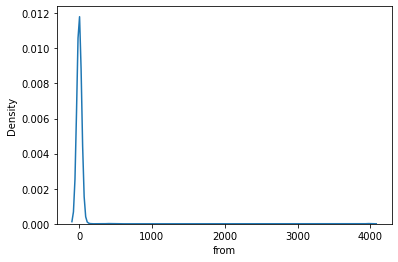

In [43]:
import seaborn as sns
sns.kdeplot(df2["from"].value_counts())

<AxesSubplot:xlabel='interacted_with', ylabel='Density'>

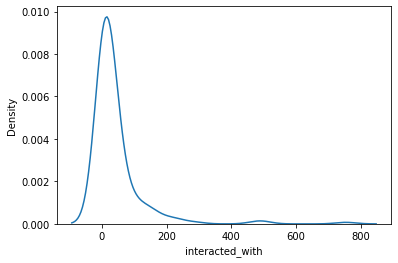

In [44]:
sns.kdeplot(df2.interacted_with.value_counts())

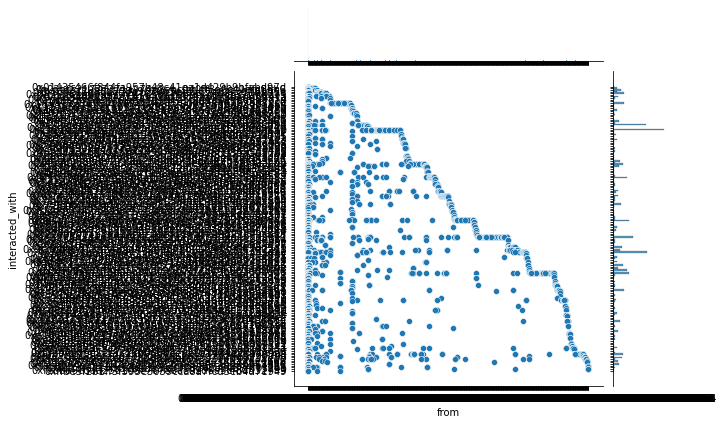

In [45]:
sns.jointplot(data=df2, x="from", y="interacted_with")

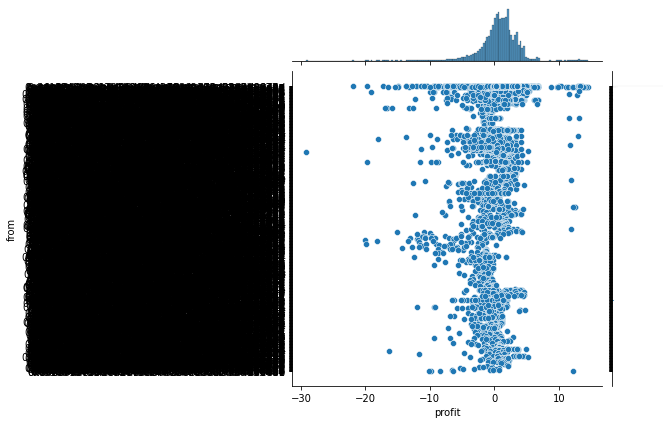

In [46]:
sns.jointplot(data=df2, x="profit", y="from")

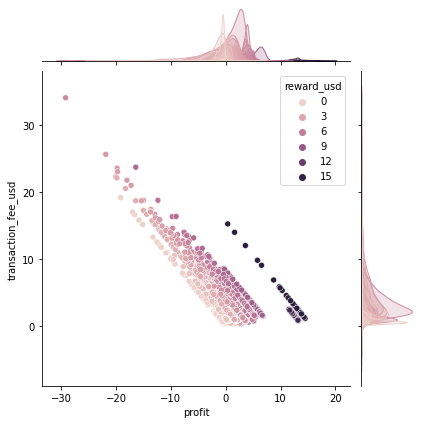

In [47]:
sns.jointplot(data=df2, x="profit", y="transaction_fee_usd", hue="reward_usd")

In [48]:
temp_df2 = df2[df2.reward_usd > 12]
temp_df2.interacted_with.value_counts()

0x714e06410b4960d3c1fc033bcd53ad9eb2d1f874    31
0xfdffdf6dc4fb30bede8af0f78d42c5468f37324b    19
Name: interacted_with, dtype: int64

<AxesSubplot:xlabel='reward_usd', ylabel='Density'>

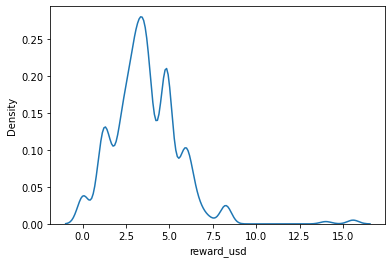

In [49]:
sns.kdeplot(data=df2, x="reward_usd")

## Mutual Information

In [50]:
from sklearn.feature_selection import mutual_info_regression
# transaction_fee_usd -> 2.21338012
# reward_usd -> 1.05110954
# block -> 0.1165578

zz = df2.transaction_fee_usd.array.reshape(-1, 1)
mi = mutual_info_regression(zz ,df2.profit)
print(mi)

[2.21349336]


In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

xx = df2.reset_index()
X = xx[["transaction_fee_usd", "reward_usd"]]
y = xx.profit

print(X)

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = XGBRegressor()
model.fit(X_train, y_train)

print(model)

      transaction_fee_usd  reward_usd
0                1.130218    2.335483
1                1.054015    2.335483
2                1.037328    2.335483
3                1.294760    2.335483
4                1.110818    2.335483
...                   ...         ...
7464             0.833130    1.060476
7465             0.833130    1.060476
7466             0.869912    1.060476
7467             1.100868    1.060476
7468             0.921082    1.060476

[7469 rows x 2 columns]
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan

In [52]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [53]:
# evaluate predictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE: "  +str(mse))

MSE: 0.12708047142036766


<AxesSubplot:xlabel='interacted_with', ylabel='profit'>

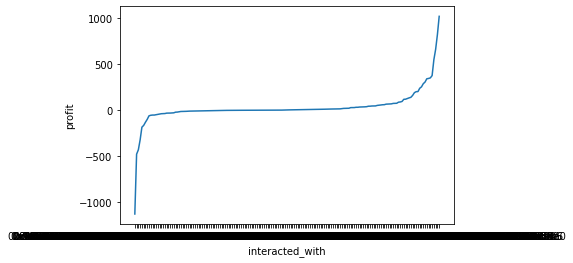

In [54]:
total_reward_usd = df2.reward_usd.sum()
total_transaction_fee_usd = df2.transaction_fee_usd.sum()
total_value_extracted = total_reward_usd - total_transaction_fee_usd
total_value_extracted

# most profitable farms
farm_profits_df = df2.groupby("interacted_with").sum().sort_values("profit")
sns.lineplot(data=farm_profits_df, x="interacted_with", y="profit")

C:\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\David\AppData\Local\Temp\ipykernel_4712\603907412.py:12: RuntimeWarning: invalid value encountered in log
  p = np.log(p)


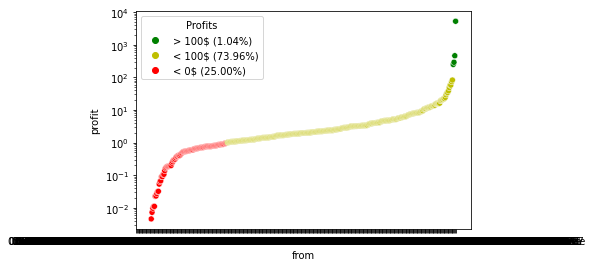

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
# most protifable addresses
address_profits_df = df2.groupby("from").sum().sort_values("profit")
log_profits = np.log(address_profits_df.profit)

# create custom palette
custom_palette = {}
counts = [0, 0, 0]
for p in address_profits_df.profit.values:
    p = np.log(p)
    if p < 0:
        counts[0] = counts[0] + 1
        custom_palette[p] = 'r'
    elif p < np.log(100):
        counts[1] = counts[1] + 1
        custom_palette[p] = 'y'
    elif p >= np.log(100):
        counts[2] = counts[2] + 1
        custom_palette[p] = 'g'

sns.scatterplot(data=address_profits_df, x="from", y="profit", hue=log_profits, palette=custom_palette, legend=False)
plt.yscale("log")

red_dot = mlines.Line2D([], [], color='r', marker='o', linestyle='None')
yellow_dot = mlines.Line2D([], [], color='y', marker='o', linestyle='None')
green_dot = mlines.Line2D([], [], color='g', marker='o', linestyle='None')

sum_counts = counts[0] + counts[1] + counts[2]

plt.legend(title='Profits', loc='upper left', handles=[green_dot, yellow_dot, red_dot], labels=['> 100$ (%.2f%%)' % (counts[2]/sum_counts*100), '< 100$ (%.2f%%)' % (counts[1]/sum_counts*100), '< 0$ (%.2f%%)' % (counts[0]/sum_counts*100)])

In [56]:
# how long it takes for profits to accumulate per farm

In [57]:
address_profits_df.iloc[0].profit

-119.8422345216625

In [58]:
address_profits_df.iloc[954].profit

5250.542259808835

# Additional grahs

## Visulize transaction fields

In [59]:
df2.head()

,interacted_with,block,from,transaction_fee,gas_limit,gas_used_by_transaction,base_fee_per_gas,max_fee_per_gas,max_priority_fee_per_gas,burned_fees,txn_savings,gas_price,nonce,reinvest_reward,currency,reward_usd,transaction_fee_usd,profit
transaction_hash,,,,,,,,,,,,,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013490,611671,453090,2.767424e-08,3.146606e-08,0.0000000021,0.013490,0.000767,2.977424e-08,555336,0.027877,AVAX,2.335483,1.130218,1.205264
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012581,611671,453090,2.776673e-08,2.800006e-08,0.00000000000001,0.012581,0.000106,2.776674e-08,5510626,0.027877,AVAX,2.335483,1.054015,1.281468
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.012382,611671,453090,2.572715e-08,2.877653e-08,0.0000000016,0.012382,0.000657,2.732715e-08,546806,0.027877,AVAX,2.335483,1.037328,1.298155
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.015454,611671,453090,3.410888e-08,3.616212e-08,0.00000000000001,0.015454,0.000930,3.410889e-08,5393919,0.027877,AVAX,2.335483,1.294760,1.040722
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,0.013259,611671,442606,2.995631e-08,3.170220e-08,0.00000000000001,0.013259,0.000773,2.995632e-08,5357424,0.027877,AVAX,2.335483,1.110818,1.224664


## Drop parameters not directely related to profitability, known relationsships and not in usd

In [61]:
df3 = df2.copy()

In [62]:
df3 = df3.drop(['gas_limit', 'gas_used_by_transaction', 'base_fee_per_gas', 'max_fee_per_gas', 'max_priority_fee_per_gas', 'gas_price', 'burned_fees', 'txn_savings'], axis=1)

In [63]:
df3 = df3.drop(['nonce', 'currency', 'transaction_fee', 'reinvest_reward'], axis=1)

In [64]:
df3.head()

,interacted_with,block,from,reward_usd,transaction_fee_usd,profit
transaction_hash,,,,,,
0xb44308c955aa4bffdd2b14f64352fd80a68f2f446b28112586a9792f79f9696b,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12939860.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,2.335483,1.130218,1.205264
0x50500eec49c8555165070262f84381c44973c494bc66365470849e2ba7c3d1f8,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12757336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,2.335483,1.054015,1.281468
0x5cec9e23495a4b3fe4804bfe9f82e523a399bcd82b1c3bdbc39b23f9de957e37,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12640161.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,2.335483,1.037328,1.298155
0xbf5bd083813afc14f2afa014494e454e1989cb67677afd21c6d26e2366f90071,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12375336.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,2.335483,1.294760,1.040722
0x1dfd5191e2d633b96cc4bd9df328dc436ef641483bea1b4522159980501e8c72,0x01435466f844fa957b48c41ea1d429b9bfabd97d,12289460.0,0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e,2.335483,1.110818,1.224664


In [65]:
block_profit_sum_df = df3.groupby('block').sum("profit").sort_values('block')

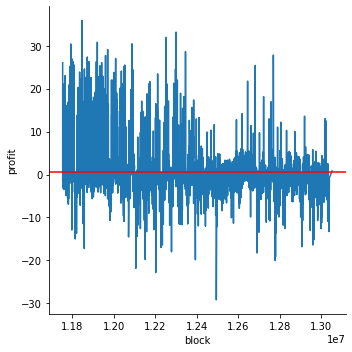

In [66]:
sns.relplot(data=block_profit_sum_df, x='block', y='profit', kind='line')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')

In [67]:
from_profit_sum_df = df3.groupby('from').sum("profit").sort_values('profit')

In [68]:
from_profit_sum_df = from_profit_sum_df.drop(["block"], axis=1)

<AxesSubplot:xlabel='from', ylabel='profit'>

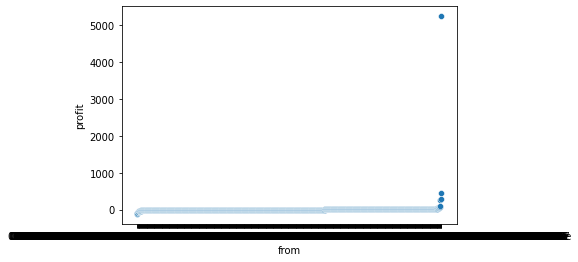

In [69]:
sns.scatterplot(data=from_profit_sum_df, x='from', y='profit')

## Results

In [70]:
# sum, min, max, mean, transaction_fee, reinvest_reward, profit
print("sums:")
print(df3.transaction_fee_usd.sum())
print(df3.reward_usd.sum())
print(df3.profit.sum())
print("mins:")
print(df3.transaction_fee_usd.min())
print(df3.reward_usd.min())
print(df3.profit.min())
print("max:")
print(df3.transaction_fee_usd.max())
print(df3.reward_usd.max())
print(df3.profit.max())
print("means:")
print(df3.transaction_fee_usd.mean())
print(df3.reward_usd.mean())
print(df3.profit.mean())

sums:
22127.93605025742
27293.5617532222
5165.625702964779
mins:
0.28083317231179533
0.0
-29.173335191424226
max:
34.05395987532762
15.5868679519994
14.470883551529639
means:
2.9626370397988246
3.6542457829993573
0.6916087432005327


<AxesSubplot:xlabel='block', ylabel='profit'>

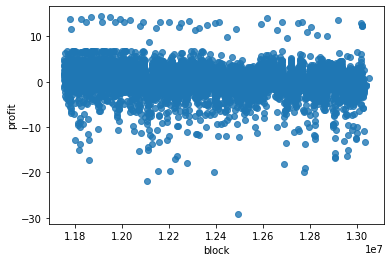

In [71]:
# transaction_fee, reinvest_reward, profit over blocknumber
#sns.regplot(data=df3, x="block", y="transaction_fee_usd")
#sns.regplot(data=df3, x="block", y="reward_usd")
sns.regplot(data=df3, x="block", y="profit")

In [72]:
# min, max, mean of users
from_df = df3.groupby("from").sum("profit").sort_values("profit")
print("min")
print(from_df.iloc[0])
print("max")
print(from_df.iloc[len(from_df)-1])

min
block                  2.019026e+08
reward_usd             1.742754e+01
transaction_fee_usd    1.372698e+02
profit                -1.198422e+02
Name: 0xdcedf06fd33e1d7b6eb4b309f779a0e9d3172e44, dtype: float64
max
block                  4.871644e+10
reward_usd             1.517626e+04
transaction_fee_usd    9.925721e+03
profit                 5.250542e+03
Name: 0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e, dtype: float64


In [73]:
# min, max, mean of yield aggregators
YA_df = df3.groupby("interacted_with").sum("profit").sort_values("profit")
print("min")
print(YA_df.iloc[0])
print("max")
print(YA_df.iloc[len(YA_df)-1])

min
block                  2.813150e+09
reward_usd             5.161934e+02
transaction_fee_usd    1.647161e+03
profit                -1.130968e+03
Name: 0x8b414448de8b609e96bd63dcf2a8adbd5ddf7fdd, dtype: float64
max
block                  9.182605e+09
reward_usd             3.679991e+03
transaction_fee_usd    2.656695e+03
profit                 1.023296e+03
Name: 0x26d9234b8409df2f2967d6af06a268b87909f5a0, dtype: float64


In [74]:
from_df.head()

,block,reward_usd,transaction_fee_usd,profit
from,,,,
0xdcedf06fd33e1d7b6eb4b309f779a0e9d3172e44,201902630.0,17.427540,137.269775,-119.842235
0x0783abc1e6f1eb93b80024a056492e314d949986,241804583.0,41.103104,126.843230,-85.740126
0x8257657158411558682b7da04c6c7f8cf1c0995b,127871012.0,23.146819,86.459051,-63.312232
0x0000131839aba5da939c0a2d03928fa2a12a9851,392013467.0,119.977567,181.456924,-61.479358
0x000014d58da1abf6414a17dca51d6d3ead0d0e08,489878301.0,134.263686,188.470540,-54.206854


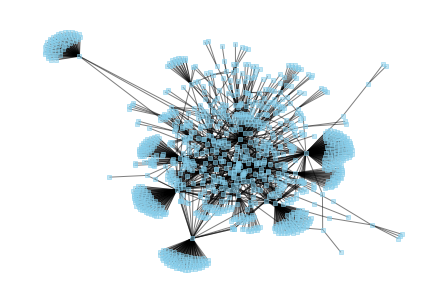

In [75]:
# network between everything for now, otherwise just use most profitable farms and most profitable users
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Build your graph
G=nx.from_pandas_edgelist(df3, "from", "interacted_with")

# Graph with Custom nodes:
nx.draw(G, with_labels=False, node_size=10, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=1)
plt.show()

In [76]:
# get most profitable YA and users and least profitable ones
# filter df for all their transactions with each other
most_profitable_YA_df = df3.groupby("interacted_with").sum("profit").sort_values("profit")
most_profitable_users_df = df3.groupby("from").sum("profit").sort_values("profit")

cut_off = 10
most_YA = most_profitable_YA_df.iloc[-cut_off:]
least_YA = most_profitable_YA_df.iloc[:cut_off]

most_users = most_profitable_users_df.iloc[-cut_off:]
least_users = most_profitable_users_df.iloc[:cut_off]
most_users
# filter transactions with most from df
uu = df3[df3["from"].isin(most_users.index)]
most_profitable_YA_and_users = uu[uu["interacted_with"].isin(most_YA.index)]

# filter transactions with most from df
uwu = df3[df3["from"].isin(least_users.index)]
least_profitable_YA_and_users = uwu[uwu["interacted_with"].isin(least_YA.index)]

In [77]:
most_users.index

Index(['0x8c085e85cabf6700866dba60b2e8bd5b57c55587',
       '0x3047a9c8b3d5291908d126d423742e92870f08ca',
       '0x725f516139fb411e1d9374a54f4b15c641850e0c',
       '0x00001149f11e7d5c36793bce2cc3b85efa935aee',
       '0x0000208350bc68c2fdc2238e52e624ecc0d191ca',
       '0x14c07a5f107a9d15a6c2d0c131dcb3933386503e',
       '0xcf7c545ea582e079a1b738f8d214eddf4528402c',
       '0x0000407394ddc3bd33e34b4d7ed95ba5fe885a27',
       '0x0c642e90b4ae7fbf1706d635401e05692e63f681',
       '0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e'],
      dtype='object', name='from')

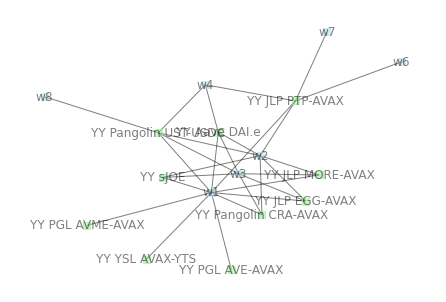

In [78]:
# most profitable YA and users
# Build your graph
G=nx.from_pandas_edgelist(most_profitable_YA_and_users, "from", "interacted_with")

# set colors
colors = []
for node in G:
    if node in most_profitable_YA_and_users["from"].values:
        colors.append("lightblue")
    else: colors.append("lightgreen")
        
# set labels
mapping = {'0x8b414448de8b609e96bd63dcf2a8adbd5ddf7fdd' : "YY Benqi AVAX",
       '0x22ede03f1115666cf05a4bafafaee8f43d42cd56':"YY JLP sAVAX-AVAX",
       '0x957ca4a4aa7cdc866cf430bb140753f04e273bc0':"YY Aave AVAX",
       '0x9e5d0e209a55de88b890d7db9f427a066144a7c4':"YY Pangolin sAVAX-AVAX",
       '0x45b38a633073a3336c47d9506344b6d3d5bfcbd7':"YY JLP DFIAT-AVAX",
       '0xb58d38f6d71cdfbc7ace55e094e2c0e1ab6ccf52':"YY JLP FLY-AVAX",
       '0x10d317cd416416674d9e67250e93529b8800a684':"Canary: CNR Stake Autocompound",
       '0x9f637540149f922145c06e1aa3f38dcdc32aff5c':"YY GMX fsGLP",
       '0x9d681f2cfb3af3279b040069ba08f526f5334a8e':"YY Pangolin FEED-AVAX",
       '0xfebba6cdaa250108c7678bac01d6e5cf81532799':"YY Blizz AVAX",
        '0xfaed69427e2444263b4c62c630a872a289a54865':"YY PGL AVE-AVAX",
       '0x779cd89462b1c05c45b1cd33f6a20373b1d76ab8':"YY JLP MORE-AVAX",
       '0x714e06410b4960d3c1fc033bcd53ad9eb2d1f874':"YY sJOE",
       '0x205504839513d6410f85b9f8c5b29cad10fc34a3':"YY Pangolin CRA-AVAX",
       '0x0345f2b85d238a963965ef8163ccb93eff81ff5e':"YY YSL AVAX-YTS",
       '0x99dba70334053c00e3f45096fc09a9b4f63db5d1':"YY JLP EGG-AVAX",
       '0x519756fdd1f9a506afb5c3af6d34e131c8d06c5e':"YY Pangolin UST-USDC",
       '0xb34fe8a87dfebd5ab0a03db73f2d49b903e63db6':"YY PGL AVME-AVAX",
       '0xa914feb3c4b580ff6933cea4f39988cd10aa2985':"YY Aave DAI.e",
       '0x26d9234b8409df2f2967d6af06a268b87909f5a0':"YY JLP PTP-AVAX",
       '0x8c085e85cabf6700866dba60b2e8bd5b57c55587':"w10",
       '0x3047a9c8b3d5291908d126d423742e92870f08ca':"w9",
       '0x725f516139fb411e1d9374a54f4b15c641850e0c':"w8",
       '0x00001149f11e7d5c36793bce2cc3b85efa935aee':"w7",
       '0x0000208350bc68c2fdc2238e52e624ecc0d191ca':"w6",
       '0x14c07a5f107a9d15a6c2d0c131dcb3933386503e':"w5",
       '0xcf7c545ea582e079a1b738f8d214eddf4528402c':"w4",
       '0x0000407394ddc3bd33e34b4d7ed95ba5fe885a27':"w3",
       '0x0c642e90b4ae7fbf1706d635401e05692e63f681':"w2",
       '0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e':"w1",
       '0xdcedf06fd33e1d7b6eb4b309f779a0e9d3172e44':"l1",
       '0x0783abc1e6f1eb93b80024a056492e314d949986':"l2",
       '0x8257657158411558682b7da04c6c7f8cf1c0995b':"l3",
       '0x0000131839aba5da939c0a2d03928fa2a12a9851':"l4",
       '0x000014d58da1abf6414a17dca51d6d3ead0d0e08':"l5",
       '0x93f5f7d6a8409557c43a21adab4dd1b6808922de':"l6",
       '0x17d12d832ff3894cc64c13ab12a619da1629dbba':"l7",
       '0x000010ed59bcb8fac3aecb568aefbf8b49daea02':"l8",
       '0x000030573bd51242cd4e1bfb580d6c01f8e58f63':"l9",
       '0x60a3a25e70e336d743f21d0e614118f5fc701a85':"l10"
  
        }
H = nx.relabel_nodes(G, mapping)

# Graph with Custom nodes
nx.draw(H, with_labels=True, node_size=50, node_shape="s", alpha=0.5, linewidths=1, node_color=colors)
plt.show()

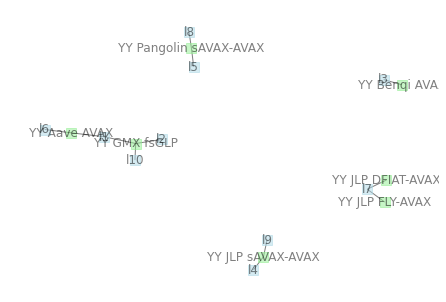

In [79]:
# least profitable YA and users
# Build your graph
G1=nx.from_pandas_edgelist(least_profitable_YA_and_users, "from", "interacted_with")

# set colors
colors = []
for node in G1:
    if node in least_profitable_YA_and_users["from"].values:
        colors.append("lightblue")
    else: colors.append("lightgreen")
        
# relabel nodes
mapping1 = {'0x8b414448de8b609e96bd63dcf2a8adbd5ddf7fdd' : "YY Benqi AVAX",
       '0x22ede03f1115666cf05a4bafafaee8f43d42cd56':"YY JLP sAVAX-AVAX",
       '0x957ca4a4aa7cdc866cf430bb140753f04e273bc0':"YY Aave AVAX",
       '0x9e5d0e209a55de88b890d7db9f427a066144a7c4':"YY Pangolin sAVAX-AVAX",
       '0x45b38a633073a3336c47d9506344b6d3d5bfcbd7':"YY JLP DFIAT-AVAX",
       '0xb58d38f6d71cdfbc7ace55e094e2c0e1ab6ccf52':"YY JLP FLY-AVAX",
       '0x10d317cd416416674d9e67250e93529b8800a684':"Canary: CNR Stake Autocompound",
       '0x9f637540149f922145c06e1aa3f38dcdc32aff5c':"YY GMX fsGLP",
       '0x9d681f2cfb3af3279b040069ba08f526f5334a8e':"YY Pangolin FEED-AVAX",
       '0xfebba6cdaa250108c7678bac01d6e5cf81532799':"YY Blizz AVAX",
        '0xfaed69427e2444263b4c62c630a872a289a54865':"YY PGL AVE-AVAX",
       '0x779cd89462b1c05c45b1cd33f6a20373b1d76ab8':"YY JLP MORE-AVAX",
       '0x714e06410b4960d3c1fc033bcd53ad9eb2d1f874':"YY sJOE",
       '0x205504839513d6410f85b9f8c5b29cad10fc34a3':"YY Pangolin CRA-AVAX",
       '0x0345f2b85d238a963965ef8163ccb93eff81ff5e':"YY YSL AVAX-YTS",
       '0x99dba70334053c00e3f45096fc09a9b4f63db5d1':"YY JLP EGG-AVAX",
       '0x519756fdd1f9a506afb5c3af6d34e131c8d06c5e':"YY Pangolin UST-USDC",
       '0xb34fe8a87dfebd5ab0a03db73f2d49b903e63db6':"YY PGL AVME-AVAX",
       '0xa914feb3c4b580ff6933cea4f39988cd10aa2985':"YY Aave DAI.e",
       '0x26d9234b8409df2f2967d6af06a268b87909f5a0':"YY JLP PTP-AVAX",
       '0x8c085e85cabf6700866dba60b2e8bd5b57c55587':"w10",
       '0x3047a9c8b3d5291908d126d423742e92870f08ca':"w9",
       '0x725f516139fb411e1d9374a54f4b15c641850e0c':"w8",
       '0x00001149f11e7d5c36793bce2cc3b85efa935aee':"w7",
       '0x0000208350bc68c2fdc2238e52e624ecc0d191ca':"w6",
       '0x14c07a5f107a9d15a6c2d0c131dcb3933386503e':"w5",
       '0xcf7c545ea582e079a1b738f8d214eddf4528402c':"w4",
       '0x0000407394ddc3bd33e34b4d7ed95ba5fe885a27':"w3",
       '0x0c642e90b4ae7fbf1706d635401e05692e63f681':"w2",
       '0xdaa99a4826b3d0e9998cb55c8c648c53a5be677e':"w1",
       '0xdcedf06fd33e1d7b6eb4b309f779a0e9d3172e44':"l1",
       '0x0783abc1e6f1eb93b80024a056492e314d949986':"l2",
       '0x8257657158411558682b7da04c6c7f8cf1c0995b':"l3",
       '0x0000131839aba5da939c0a2d03928fa2a12a9851':"l4",
       '0x000014d58da1abf6414a17dca51d6d3ead0d0e08':"l5",
       '0x93f5f7d6a8409557c43a21adab4dd1b6808922de':"l6",
       '0x17d12d832ff3894cc64c13ab12a619da1629dbba':"l7",
       '0x000010ed59bcb8fac3aecb568aefbf8b49daea02':"l8",
       '0x000030573bd51242cd4e1bfb580d6c01f8e58f63':"l9",
       '0x60a3a25e70e336d743f21d0e614118f5fc701a85':"l10"
}
H1 = nx.relabel_nodes(G1, mapping1)

# Graph with Custom nodes
nx.draw(H1, with_labels=True, node_size=100, node_color=colors, node_shape="s", alpha=0.5, linewidths=1)


plt.show()

In [82]:
#get total trnsaction fees paid, reinvest rewad, profit
df3["transaction_fee_usd"].sum()

22127.93605025742

In [83]:
df3["reward_usd"].sum()

27293.5617532222

In [84]:
df3["profit"].sum()

5165.625702964779

In [89]:
len(df3["interacted_with"].unique())

173

In [90]:
len(df3["from"].unique())

955